### * Importing functions from Previous Notebooks

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
from initial_functions_from_01 import data_call,accuracy_fn,print_train_time,results_model_0
from major_steps import train_step,test_step,eval_model,results_model1

In [3]:
train_data,test_data,train_dataloader,test_dataloader=data_call()

In [4]:
class_names=train_data.classes

In [5]:
device="cuda" if torch.cuda.is_available() else "cpu"

## 7. Model 2 : Building a Convolutional Neural Network(CNN)

In [6]:
class FashionMNISTModelV2(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                        stride=2)
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                     out_features=output_shape)
        )
    def forward(self, x:torch.Tensor):
        x = self.block_1(x)
        #print(x.shape)
        x = self.block_2(x)
        #print(x.shape)
        x = self.classifier(x)
        #print(x.shape)
        return x

In [7]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

### 7.1 Stepping through nn.Con2d()

In [8]:
torch.manual_seed(42)

# Create Sample batch of random numbers with same size as image batch
images =  torch.randn(size=(32,3,64,64))
test_image=images[0] #get single image for testing
print(f"Image batch shape : {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape : {test_image.shape} -> [color_channels, height, width]")

Image batch shape : torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape : torch.Size([3, 64, 64]) -> [color_channels, height, width]


In [9]:
torch.manual_seed(42)

#create a convolutional layer with same dimension as TinyVGG
#(try changing any of the parameters and see what happens)

conv_layer = nn.Conv2d(in_channels=3,
                        out_channels=10,
                      kernel_size=3,
                      stride=1,
                      padding=0)
conv_layer(test_image)

tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
         [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
         [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
         ...,
         [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
         [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
         [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

        [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
         [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
         [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
         ...,
         [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
         [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
         [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

        [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
         [ 0.8117,  0.3191, -0.0157,  ...,  1

In [10]:
test_image.shape

torch.Size([3, 64, 64])

In [11]:
output=conv_layer(test_image)
output.shape

torch.Size([10, 62, 62])

In [12]:
# Add extra dimension to test_image
test_image.unsqueeze(dim=0).shape

torch.Size([1, 3, 64, 64])

In [13]:
#Pass test image with extra dimension through conv_layer
conv_layer(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 62, 62])

In [14]:
torch.manual_seed(42)
# create a new conv_layer with different values 
conv_layer_2 = nn.Conv2d(in_channels=3,
                        out_channels=10,
                        kernel_size=(5,5),
                        stride=2,
                        padding=0)
conv_layer_2(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 30, 30])

In [15]:
#Get shapes of weight and bias tensor within conv_layer_2
print(f"conv_layer_2 weight shape: \n{conv_layer_2.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5]")

print(f"\nconv_layer_2 bias shape: \n{conv_layer_2.bias.shape} -> [out_channels=10]")

conv_layer_2 weight shape: 
torch.Size([10, 3, 5, 5]) -> [out_channels=10, in_channels=3, kernel_size=5]

conv_layer_2 bias shape: 
torch.Size([10]) -> [out_channels=10]


### 7.2 Stepping though nn.MaxPool2d()

In [16]:
# Print out original image shape without and with unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")

# Create a sample nn.MaxPool2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_though_conv=conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_though_conv.shape}")

#Pass data though max pool layer
test_image_though_conv_and_max_pool=max_pool_layer(test_image_though_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_though_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


In [17]:
torch.manual_seed(42)
#Create a random tensor with a similar number of dimension to our images
random_tensor = torch.randn(size=(1,1,2,2))
print(f"Random Tensor:\n{random_tensor}")
print(f"Random Tensor shape: {random_tensor.shape}")

#Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

#Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor :\n{max_pool_tensor}<- this is the maximum value from random_tensor")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Random Tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random Tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor :
tensor([[[[0.3367]]]])<- this is the maximum value from random_tensor
Max pool tensor shape: torch.Size([1, 1, 1, 1])


### 7.3 Setup a loss function and optimizer for model_2

In [18]:
#Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.1)

### 7.4 Training ans testing model_2 using our training and test functions

In [19]:
torch.manual_seed(42)
from tqdm.auto import tqdm
#Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

#Train and test model
epochs=3
for epoch in tqdm(range(epochs)):
    print(f"Epoch :{epoch}\n-----")
    train_step(data_loader=train_dataloader,
              model=model_2,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn,
              device=device)
    test_step(data_loader=test_dataloader,
             model=model_2,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)
    
train_time_end_model_2=timer()
total_train_time_model_2=print_train_time(start=train_time_start_model_2,
                                         end=train_time_end_model_2,
                                         device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch :0
-----
Train loss: 0.59549 || Train accuracy : 78.39%
Test loss: 0.39254 | Test accuracy: 86.00%

Epoch :1
-----
Train loss: 0.36263 || Train accuracy : 87.04%
Test loss: 0.35966 | Test accuracy: 86.88%

Epoch :2
-----
Train loss: 0.32490 || Train accuracy : 88.31%
Test loss: 0.32040 | Test accuracy: 88.38%

Train time on cuda: 47.888 seconds


In [20]:
#get model_2 result 
model_2_results = eval_model(model=model_2,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                            device=device)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3203989267349243,
 'model_acc': 88.37859424920129}

## 8. Compare Model result and training time

In [21]:
import pandas as pd

In [22]:
model_0_results=results_model_0()
model_1_result=results_model1()

In [23]:
compare_results=pd.DataFrame([model_0_results, model_1_result, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.320399,88.378594


### 8.1 Performance-speed tradeoff

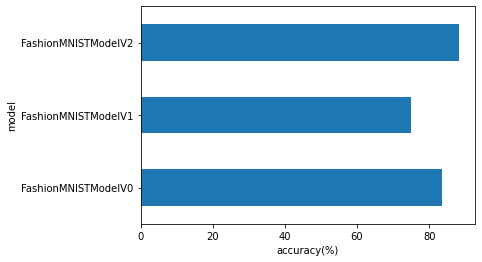

In [24]:
#visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy(%)")
plt.ylabel("model");

## 9. Make and evaluate random predictions with best model

In [25]:
def make_predictions(model: torch.nn.Module, data:list, device: torch.device=device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            #Prepare sample
            sample = torch.unsqueeze(sample,dim=0).to(device)
            pred_logit = model(sample)
            #Forward pass (model output raw logits)
            pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)
            #Note: perform softmax on the logits dimension not batch dimension
            
            #get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())
    #Stack the preb_probs to turn list into tensor
    return torch.stack(pred_probs)

In [26]:
import random
random.seed(42)
test_samples=[]
test_labels=[]
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)
#view the first test sample shape and label
print(f"Test sample image shape : {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape : torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [27]:
#Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2, data=test_samples)

# View first two prediction probabilties list
pred_probs[:2]

tensor([[2.5335e-08, 4.3957e-08, 1.3423e-08, 2.1526e-09, 2.6040e-09, 9.9984e-01,
         1.2203e-07, 7.9374e-07, 1.2506e-05, 1.4433e-04],
        [7.1830e-02, 6.8617e-01, 5.5959e-04, 1.1050e-01, 8.3063e-02, 9.1720e-05,
         4.7119e-02, 2.2883e-04, 2.8436e-04, 1.5756e-04]])

In [28]:
# Turn the prediction probavilities into prediction labels by taking agrmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [29]:
test_labels, pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 1, 7, 4, 3, 0, 4, 7, 1]))

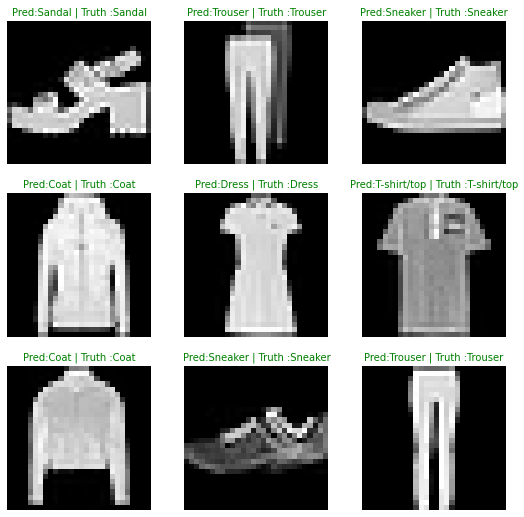

In [30]:
#plot preditions
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i, sample in enumerate(test_samples):
    #Create a subplot 
    plt.subplot(nrows, ncols, i+1)
    
    #Plot the target image
    plt.imshow(sample.squeeze(),cmap="gray")
    
    #Find the prediction label 
    pred_label=class_names[pred_classes[i]]
    
    #get the truth label
    truth_label=class_names[test_labels[i]]
    
    #create the title text of the plot
    title_text=f"Pred:{pred_label} | Truth :{truth_label}"
    
    #check for equality and change title color accordingly
    if pred_label==truth_label:
        plt.title(title_text, fontsize=10, c="g")
    else:
        plt.title(title_text, fontsize=10, c="r")
    plt.axis(False)

## 10. Making a confusion matrix for further prediction evaluation

In [31]:
y_preds=[]
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader,desc="Making preditions"):
        X, y = X.to(device), y.to(device)
        y_logit=model_2(X)
        y_pred=torch.softmax(y_logit, dim=1).argmax(dim=1)
        y_preds.append(y_pred.cpu())
    y_pred_tensor=torch.cat(y_preds)

Making preditions:   0%|          | 0/313 [00:00<?, ?it/s]

In [32]:
#import mlxtend upgrade version
import mlxtend
print(mlxtend.__version__)

0.23.1


C:\Users\Mohd Sahil\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\Mohd Sahil\AppData\Local\Programs\Python\Python310\lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")


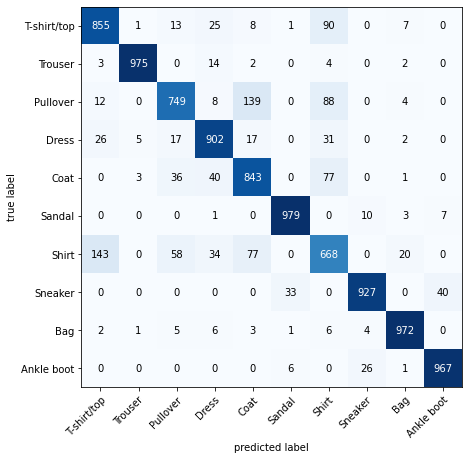

In [33]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
confmat_tensor=confmat(preds=y_pred_tensor,
                      target=test_data.targets)

fig, ax=plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)

## 11. Save and Load best performing model

In [34]:
from pathlib import Path
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,
                exist_ok=True)
MODEL_NAME="03_cnn_final_model.pth"
MODEL_SAVE_PATH=MODEL_PATH / MODEL_NAME

print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),f=MODEL_SAVE_PATH)

Saving model to : models\03_cnn_final_model.pth


In [35]:
loaded_model_2=FashionMNISTModelV2(input_shape=1,
                                  hidden_units=10,
                                  output_shape=10)
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_2=loaded_model_2.to(device)

In [36]:
#Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results=eval_model(model=loaded_model_2,
                                 data_loader=test_dataloader,
                                 loss_fn=loss_fn,
                                 accuracy_fn=accuracy_fn,
                                 device=device)
loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3203989267349243,
 'model_acc': 88.37859424920129}